# Najbolj popularni animeji
## Projektna naloga pri predmetu Programiranje 1.

Za to projektno nalogo sem zajel prvih 3000 najbolj popularnih animejev s strani [MyAnimeList](https://myanimelist.net/topanime.php). Podatki so rangirani glede na [tale](https://myanimelist.net/info.php?go=topanime) kriterij.
Za pridobitev in obdelavo podatkov sem, bolj kot ne, uporabil kodo, ki jo je profesor Pretnar pripravil za predavanja.

#### Naloga je sestavljena iz štirih delov:
1. ZBRANI PODATKI:
    - Definicija animeja
    - Delovne hipoteze
    - Z zajemom sestavljena tabela.
2. OSNOVNA STATISTIKA: Podatki, pridobljeni s preureditvijo tabele.
3. IZRAČUNANA STATISTIKA: Podatki, ki jih moramo izračunati oz. razbrati, odvisnosti in podobno.
4. DODATNE HIPOTEZE: za zabavo bom morda pogledal še kakšno hipotezo, ki je nisem napovedal v Readme.md datoteki.



### ZBRANI PODATKI
* Podatki ki sem jih zbral za posamezni anime:
    - rang
    - id
    - naslov
    - leto izida (Leto, v katerem je bila predvajana oz. izdana prva epizoda)
    - dolžina(število epizod)
    - tip
    - MyAnimeList ocena
    - število ogledov

Glavni razlog, zakaj nisem zajel več različnih tipov podatkov, je dejstvo, da če bi želel zajeti več podatkov (npr. studio/ji, ki je/so sproduciral/i anime), bi moral za vsaki anime posebej dol potegniti spletno stran (torej 3000 spletnih strani). V prvi vrsti dvomim, da bi mi strežnik to dopustil v enem poskusu, kaj šele v vseh (mnogih) poskusih, ki sem jih izvedel, da sem sestavil to nalogo, v drugi vrsti pa je to res ogromna količina datotek, ki bi jih moral prečesati in v primeru napake, prečesati še enkrat. Krajše povedano: Časovna zahtevnost projekta bi se znatno povečala. 

#### Kaj je anime?
[Anime](https://en.wikipedia.org/wiki/Anime) je originalno japonski izraz za animacijo, torej vse oblike animiranih medijev (filmi, serije itd.). Izven Japonske se termin nanaša specifično na animacije, ki izvirajo iz Japonske, ali pa na animacijski, ki se je najprej razširil na Japonskem, za katerega je značilna tako vizualna kot tudi karakterna barvitost/pestrost in fantazijske teme. Spletna stran kot anime upošteva vse vzhodno-azijske animacije, ki so bodisi japonske, bodisi spadajo pod prej omenjeni stil.
Animeje se deli na več tipov, za nas so pomembni tile:
* TV: Animirana serija, ki je bila (najprej) predvajana po televiziji.
* Movie: Animiran film, ki je bil (najprej) predvajan v kinih.
* Special: Posebej izdana animacija, ki se jo lahko najde na televiziji, ali pa je izdana kot DVD.
* OVA: "O(riginal) V(ideo) A(nimation)", animacija, ki je direktno izdana na disku in predhodno ni predvajana na televiziji ali v kinih. 
* ONA: "O(riginal) N(etwork) A(nimation)", animacija, ki je najprej izdana na spletu.
O slednjih treh tipih si lahko več preberete [tukaj](https://aminoapps.com/c/anime/page/blog/defining-ova-ona-special-episodes-and-movies/bEto_u8PomgzmRaW7MLjQxz5LoZ6VP)

Kot sem prej omenil, je rang animeja določen s pomočjo kriterija s strani MyAnimeList. Tako bom na začetku malce pokomentiral ta kriterij.
Za izračun "Težnostnega ranga" animeja potrebujemo povprečno oceno tega animeja, število vseh ocen animeja, minimalno število ocen, da se sploh "splača" računat (trenutno je to 50 ocen) in povprečno oceno po vseh animejih. Anime lahko ocenijo samo registrirani uporabniki te spletne strani, kar pomeni, da podatki, ki so bili zbrani s te strani, niso nujno najbolj natančni, še posebej ne za starejše animeje.

Skozi vso projektno nalogo bom odgovarjal na sledeča vprašanja:
* Ali je zlata doba animejev že mimo, ali se šele začenja?
* Ali so bolj popularni animirani filmi, ali serije?
* Kako dolžina (TV)serije vpliva na njen uspeh?
* V kakšnem razmerju sta število ogledov in MyAnimeList ocena?

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib

pd.options.display.max_rows = 20

animeji = pd.read_csv('obdelani-podatki/vsi-animeji.csv', index_col = 'rang')

In [2]:
print(matplotlib.__version__)

3.0.2


In [3]:
animeji

,id,naslov,tip,st_epizod,leto,ogledi,ocena
rang,,,,,,,
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2009,1327051,9.2
2,32281,Kimi no Na wa.,Movie,1,2016,866945,9.1
3,9253,Steins;Gate,TV,24,2011,1116166,9.1
4,28977,Gintama°,TV,51,2015,226008,9.1
5,11061,Hunter x Hunter (2011),TV,148,2011,818148,9.1
6,820,Ginga Eiyuu Densetsu,OVA,110,1988,140128,9.1
7,9969,Gintama',TV,51,2011,235640,9.1
8,35180,3-gatsu no Lion 2nd Season,TV,22,2017,114343,9.0
9,15417,Gintama': Enchousen,TV,13,2012,137790,9.0


Iz do sedaj neznanega razloga ni bilo zajetih 70 datotek. Zaradi tega av tabeli ni 3000 vrstic, temveč zgolj 2930. Napako bom poskusil odpraviti, če mi to ne uspe, pa je zajeti vzorec še vedno dovolj obsežen, da ta izguba ni občutna.

### OSNOVNA STATISTIKA
Oglejmo si, kateri izmed zajetih animejev je najstarejši(posledično bomo videli tudi kateri je najmlajši) in kateri je bil do zdaj najbolj gledan.

In [4]:
animeji_po_starosti = animeji.sort_values('leto')

In [5]:
animeji_po_starosti

,id,naslov,tip,st_epizod,leto,ogledi,ocena
rang,,,,,,,
2235,22419,Acchi Kocchi,Movie,1,1962,5528,7.3
2700,2747,Tetsuwan Atom,TV,193,1963,7128,7.2
2310,3009,Tiger Mask,TV,105,1969,5871,7.3
2710,5760,Dororo to Hyakkimaru,TV,26,1969,2455,7.2
227,2402,Ashita no Joe,TV,79,1970,34916,8.3
1041,1412,Lupin III,TV,23,1971,51718,7.7
1961,2253,Mazinger Z,TV,92,1972,9012,7.4
1861,501,Doraemon,TV,26,1973,11674,7.4
2561,5658,Great Mazinger,TV,56,1974,3011,7.2


Iz urejene tabele vidimo, da je najstarejši zajeti anime animiran film "Acchi Kocchi" iz leta 1962, najmlajši anime pa ONA "Isekai Izakaya: Koto Aitheria no Izakaya Nobu", ki je izšel leta 2018. Iz povezave v definiciji animeja pa vemo, da je prvi izšel že leta 1917, kar potrjuje, da je naš vzorec nepopoln.

In [6]:
animeji_po_ogledih = animeji.sort_values('ogledi', ascending=False)

In [7]:
animeji_po_ogledih

,id,naslov,tip,st_epizod,leto,ogledi,ocena
rang,,,,,,,
53,1535,Death Note,TV,37,2006,1582700,8.6
113,16498,Shingeki no Kyojin,TV,25,2013,1472352,8.4
1410,11757,Sword Art Online,TV,25,2012,1415367,7.5
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2009,1327051,9.2
45,30276,One Punch Man,TV,12,2015,1160132,8.7
581,22319,Tokyo Ghoul,TV,12,2014,1123638,7.9
3,9253,Steins;Gate,TV,24,2011,1116166,9.1
253,6547,Angel Beats!,TV,13,2010,1089044,8.2
177,19815,No Game No Life,TV,12,2014,1074522,8.3


Iz te tabele pa lahko razberemo, da je do zdaj najbolj ogledan anime bil "Death Note" iz leta 2006, najmanj ogledov pa je prejel "Xing Chen Bian" iz 2018.

### IZRAČUNANA STATISTIKA
V tem delu naloge bom s pomočjo grafov odgovoril na zgoraj zastavljena vprašanja.
Najprej grupiramo animeje po desetletjih, da bodo grafi bolj pregledni, tam kjer bo to imelo kak efekt.

In [8]:
animeji['desetletje'] = 10 * (animeji.leto // 10)

In [9]:
animeji

,id,naslov,tip,st_epizod,leto,ogledi,ocena,desetletje
rang,,,,,,,,
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2009,1327051,9.2,2000
2,32281,Kimi no Na wa.,Movie,1,2016,866945,9.1,2010
3,9253,Steins;Gate,TV,24,2011,1116166,9.1,2010
4,28977,Gintama°,TV,51,2015,226008,9.1,2010
5,11061,Hunter x Hunter (2011),TV,148,2011,818148,9.1,2010
6,820,Ginga Eiyuu Densetsu,OVA,110,1988,140128,9.1,1980
7,9969,Gintama',TV,51,2011,235640,9.1,2010
8,35180,3-gatsu no Lion 2nd Season,TV,22,2017,114343,9.0,2010
9,15417,Gintama': Enchousen,TV,13,2012,137790,9.0,2010


##### Prvo vprašanje
Sedaj se lotimo prvega vprašanja: Ali je zlata doba animejev že mimo, ali se šele začenja?

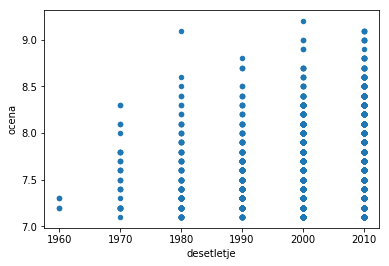

In [10]:
animeji[animeji.desetletje >= 1950].plot.scatter('desetletje', 'ocena')

Zgornji graf namiguje, da je zlata doba animejev bila v prejšnjem desetletju. Poglejmo si zdaj še enak graf, razdeljen po letih, in poglejmo, ali je bilo katero leto resnićno dobro za animeje.

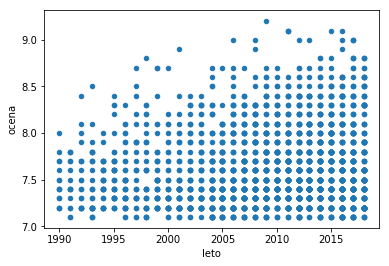

In [11]:
animeji[animeji.leto >= 1990].plot.scatter('leto', 'ocena')

Iz zgornjega grafa lahko razberemo, da so animeji doživeli svoj vrh leta 2009.

Da dokončno preverimo, če je zlata doba animeja bila v prvem desetletju enaindvajsetega stoletja, poglejmo še povprečno oceno po letih in desetletjih.

In [12]:
animeji_po_desetletjih = animeji.groupby('desetletje')
animeji_po_letih = animeji.groupby('leto')

In [13]:
animeji_po_desetletjih.mean()

,id,st_epizod,leto,ogledi,ocena
desetletje,,,,,
1960,8483.750000,81.250000,1965.750000,5245.500000,7.250000
1970,2274.914286,100.114286,1976.514286,15104.628571,7.560000
1980,2334.875000,33.986111,1985.111111,32113.500000,7.509028
1990,2470.233677,21.824742,1995.323024,45236.525773,7.538488
2000,3023.228202,19.787944,2005.575888,90992.775027,7.576319
2010,22857.150622,10.490504,2014.121807,119132.969876,7.657695


Iz zgornje tabele razberemo, da se v povprečju ocena animeja skozi čas povečuje, kar nam pove, da je zlata doba animejev bodisi zdaj, ali pa se še ni zgodila.

In [14]:
animeji_po_letih.mean()

,id,st_epizod,ogledi,ocena,desetletje
leto,,,,,
1962,22419.000000,1.000000,5528.000000,7.300000,1960.0
1963,2747.000000,193.000000,7128.000000,7.200000,1960.0
1969,4384.500000,65.500000,4163.000000,7.250000,1960.0
1970,2402.000000,79.000000,34916.000000,8.300000,1970.0
1971,1412.000000,23.000000,51718.000000,7.700000,1970.0
1972,2253.000000,92.000000,9012.000000,7.400000,1970.0
1973,501.000000,26.000000,11674.000000,7.400000,1970.0
1974,3177.666667,44.666667,12347.666667,7.333333,1970.0
1975,2890.250000,56.000000,3859.750000,7.350000,1970.0


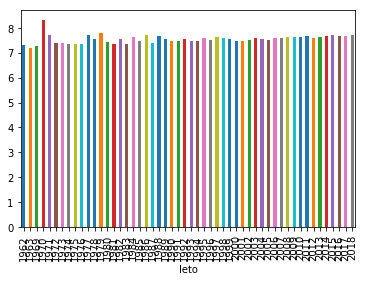

In [15]:
animeji_po_letih['ocena'].mean().plot(kind='bar')

tudi iz tega grafa lahko vidimo, da kvaliteta animejev v povprečju narašča, kar potrjuje prejšnji zaključek. Zlata doba animejev torej bodisi še poteka, bodisi se še ni zgodila. S tem smo odgovorili na prvo vprašanje.

##### Drugo vprašanje
Sedaj bomo pogledali, kako tip animeja vpliva na število ogledov.

In [16]:
animeji_po_tipu = animeji.groupby('tip')

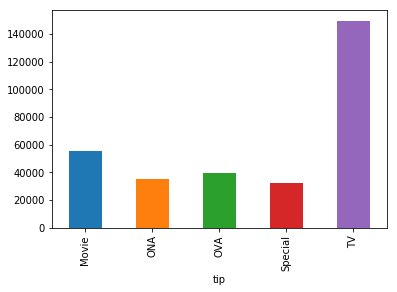

In [21]:
animeji_po_tipu['ogledi'].mean().plot(kind='bar')

Iz grafa razberemo, da so najbolj popularne TV serije, filmi pa so tik za njimi.

##### Tretje vprašanje
Poglejmo zdaj, kako dolžina TV serije vpliva na število ogledov

In [ ]:
a